In [1]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [2]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

def hyperRamsey(psi0, t1, T, t2, delta, delPrime, Omega0):
    #psi0 = original state
    #t1 = pulse 1 duration
    #T = dark time
    #t2 = pulse 2 duration
    #Omega0 = rabi freq
    #delta = dark time detuning
    #delPrime = pulse detuning
    #phi = phase injection
    
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse2@freeEvo@pulse1@psi0

def hyperRamseyP(psi0, t1, T, t2, delta, delPrime, Omega0):
    #psi0 = original state
    #t1 = pulse 1 duration
    #T = dark time
    #t2 = pulse 2 duration
    #Omega0 = rabi freq
    #delta = dark time detuning
    #delPrime = pulse detuning
    #phi = phase injection
    
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyM(psi0, t1, T, t2, delta, delPrime, Omega0):
    #psi0 = original state
    #t1 = pulse 1 duration
    #T = dark time
    #t2 = pulse 2 duration
    #Omega0 = rabi freq
    #delta = dark time detuning
    #delPrime = pulse detuning
    #phi = phase injection
    
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRerrSig(psi0, t1, T, t2, delta, delPrime, Omega0):
    RhoeeP = rhoee(hyperRamseyP(psi0,t1,T,t2,delta,delPrime,Omega0))
    RhoeeM = rhoee(hyperRamseyM(psi0,t1,T,t2,delta,delPrime,Omega0))
    return RhoeeP - RhoeeM

def ramseyInjP(psi0, t, delta, delPrime, Omega0):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pi2Pulse@pi2PhaseInj@freeEvo@pi2Pulse@psi0

def ramseyInjM(psi0, t, delta, delPrime, Omega0):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pi2Pulse@pi2PhaseInj@freeEvo@pi2Pulse@psi0

def errSig(psi0, t, delta, delPrime, Omega0):
    RhoeeP = rhoee(ramseyInjP(psi0,t,delta,delPrime,Omega0))
    RhoeeM = rhoee(ramseyInjM(psi0,t,delta,delPrime,Omega0))
    return RhoeeP - RhoeeM

In [3]:
def HRvalidate_interval(psi0, t1, T, t2, Delta, Omega0, x0, x1):
    return HRerrSig(psi0, t1, T, t2, x0, x0+Delta, Omega0) * HRerrSig(psi0, t1, T, t2, x1, x1+Delta, Omega0) < 0

def error_bound(a, b, err):
    n = np.log((b - a) / err) / np.log(2)
    return int(np.ceil(n))

def HRfindRoot(psi0, t1, T, t2, Delta, Omega0, tol):
    #find initial interval (will only work for small Delta):
    
    x0 = -0.1*Delta/(Omega0*T) - 0.05*np.abs(2.0*Delta/(Omega0*T)) - 0.01
    x1 = -0.1*Delta/(Omega0*T) + 0.05*np.abs(2.0*Delta/(Omega0*T)) + 0.01
    #print(x0,x1)
    
    if not HRvalidate_interval(psi0, t1, T, t2, Delta, Omega0, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRerrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega0)
        if -tol < y < tol:
            return root_approx
        if HRvalidate_interval(psi0, t1, T, t2, Delta, Omega0, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1

In [4]:
def validate_interval(psi0, t, Delta, Omega0, x0, x1):
    return errSig(psi0, t, x0, x0+Delta, Omega0) * errSig(psi0, t, x1, x1+Delta, Omega0) < 0

def error_bound(a, b, err):
    n = np.log((b - a) / err) / np.log(2)
    return int(np.ceil(n))

def findRoot(psi0, t, Delta, Omega0, tol): 
    x0 = -2.0*Delta/(Omega0*t) - 0.5*np.abs(2.0*Delta/(Omega0*t)) - 0.01
    x1 = -2.0*Delta/(Omega0*t) + 0.5*np.abs(2.0*Delta/(Omega0*t)) + 0.01
    
    if not validate_interval(psi0, t, Delta, Omega0, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = errSig(psi0, t, root_approx, root_approx+Delta, Omega0)
        if -tol < y < tol:
            return root_approx
        if validate_interval(psi0, t, Delta, Omega0, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1

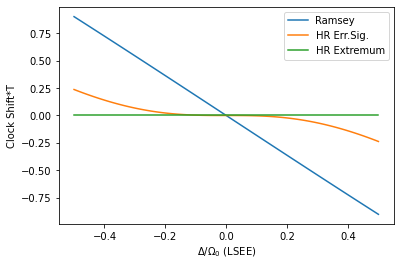

In [7]:
psi0 = psi(0.0, 1.0)
Omega0 = 1.0
t1 = np.pi/(2.0*Omega0)
T = 20.0/Omega0
t2 = 3.0*np.pi/(2.0*Omega0)
tol = 1.0e-10

pts = 101
Deltas = np.linspace(-0.5, 0.5, pts)
clockShifts0 = [0.0]*pts
clockShifts1 = [0.0]*pts
clockShifts2 = [0.0]*pts

for ii in range(pts):
    clockShifts0[ii] = T*findRoot(psi0, T, Deltas[ii], Omega0, tol)
    clockShifts1[ii] = T*HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega0, tol)
    #clockShifts2[ii] = T*CSbyMax(psi0, t1, T, t2, Deltas[ii], Omega0)
    
plt.plot(Deltas, clockShifts0, label='Ramsey')
plt.plot(Deltas, clockShifts1, label='HR Err.Sig.')
plt.plot(Deltas, clockShifts2, label='HR Extremum')
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.legend()
plt.show()

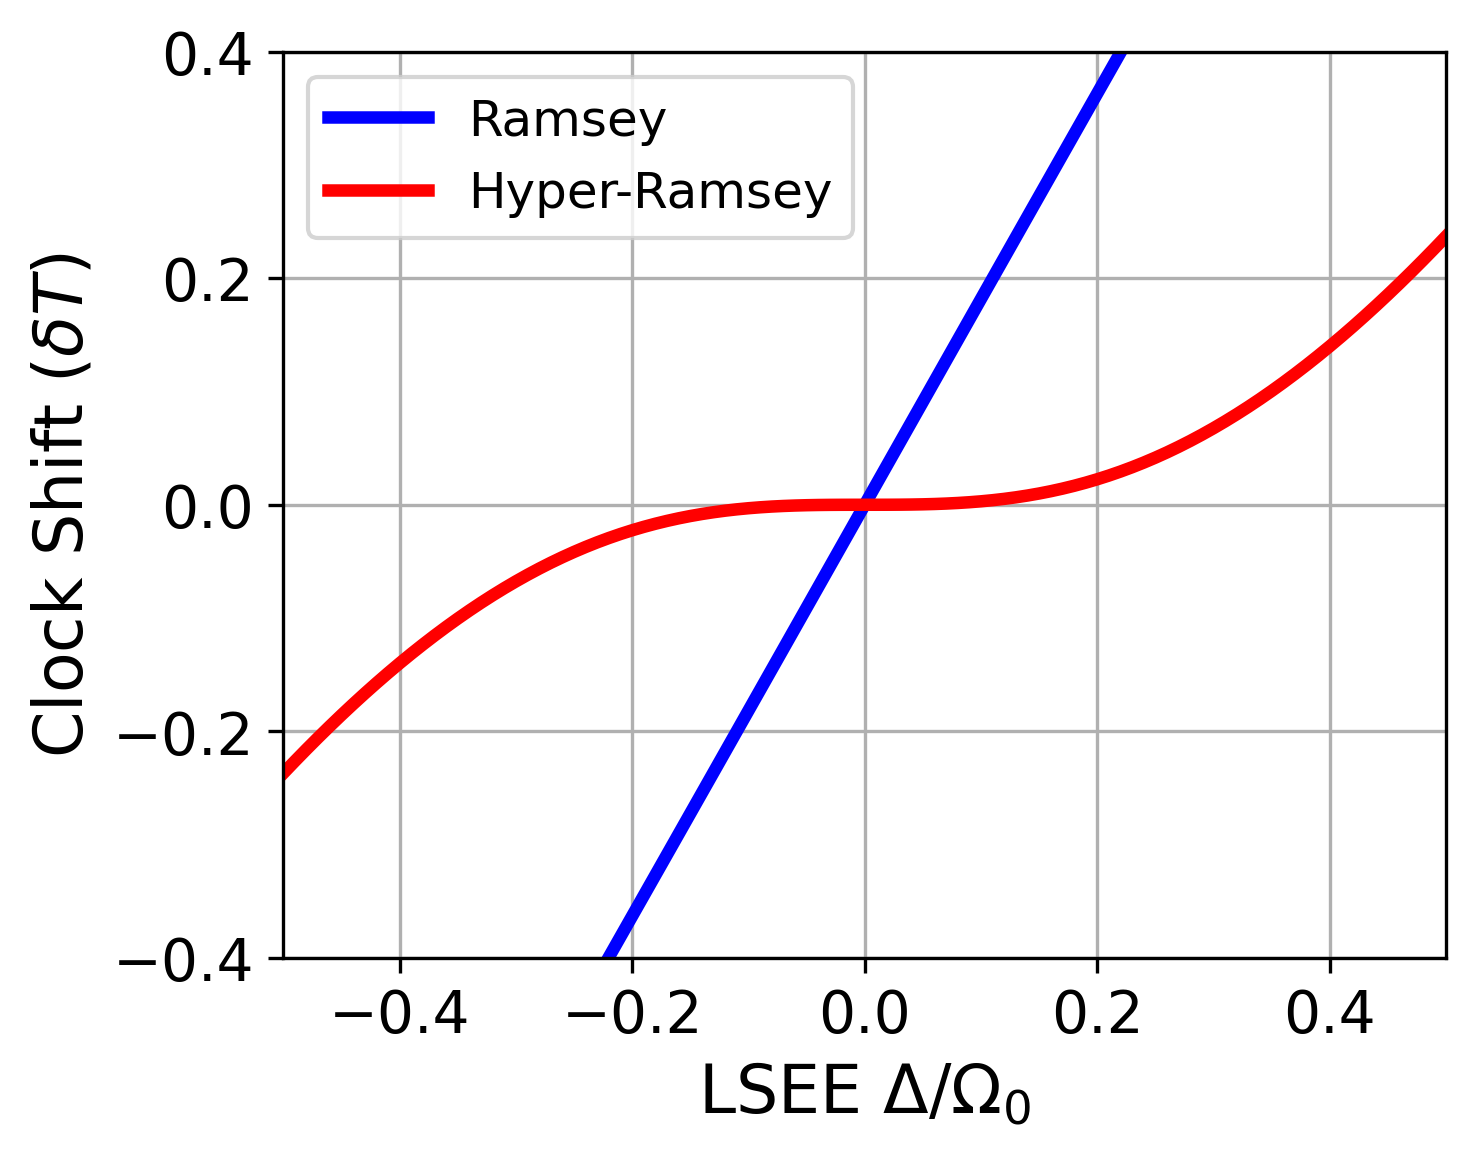

In [24]:
plt.figure(figsize=(5,4),dpi=300)

plt.plot(-Deltas, clockShifts0, label='Ramsey', color="blue", linewidth =3)
plt.plot(-Deltas, clockShifts1, label='Hyper-Ramsey', color="red", linewidth=3)
#plt.plot(-Deltas, clockShifts2, label='HR Extremum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.4, 0.4])
plt.xticks(fontsize=14)
plt.yticks(np.linspace(-0.4, 0.4, 5), fontsize=14)
plt.xlabel(r"LSEE $\Delta / \Omega_0$", fontsize="16")
plt.ylabel(r'Clock Shift ($\delta T$)', fontsize="16")
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [52]:
def errSigFunc(deld):
    psi0 = psi(0.0, 1.0)
    Omega0 = 1.0
    t1 = np.pi/(2.0*Omega0)
    T = 20.0/Omega0
    t2 = 3.0*np.pi/(2.0*Omega0)
    tol = 1.0e-10
    Delta=0.0

    return HRerrSig(psi0, t1, T, t2, deld, deld+Delta, Omega0)

In [45]:
def f(x,y):
    return x + g(y)

def g(y):
    return y**2.0

In [53]:
sol=sp.optimize.root(errSigFunc,0.0)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

array([-1.])